<a href="https://colab.research.google.com/github/Sparrow0hawk/crime_sim_toolkit/blob/develop-refactor-populate-offence/examples/crime_sim_poisson_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example notebook for using the crime_sim_toolkit

Follow these steps to load your own data into the crime_sim_toolkit for generating new crime data using the Poisson Sampler function.

## Notes on running
For this to run successfully follow these steps:


1.   Git clone the repo into the root dir
2.   Run pip install within the downloaded repo
3.   Reset the local runtime to allow for pip packages installed to work
4.   Then run python setup.py install on downloaded repo

The package should now be useable within the notebook.



In [1]:
%cd ~/

! git clone --single-branch --branch develop-refactor-populate-offence https://github.com/Sparrow0hawk/crime_sim_toolkit.git

/root
Cloning into 'crime_sim_toolkit'...
remote: Enumerating objects: 58, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 1165 (delta 27), reused 33 (delta 14), pack-reused 1107
Receiving objects: 100% (1165/1165), 49.24 MiB | 26.22 MiB/s, done.
Resolving deltas: 100% (758/758), done.


In [2]:
%cd ~/crime_sim_toolkit

!pip install -q -r requirements.txt

/root/crime_sim_toolkit
     |████████████████████████████████| 163kB 5.7MB/s 
     |████████████████████████████████| 215kB 14.9MB/s 
     |████████████████████████████████| 92kB 8.4MB/s 
     |████████████████████████████████| 133kB 16.4MB/s 
     |████████████████████████████████| 286kB 15.5MB/s 
     |████████████████████████████████| 13.1MB 17.6MB/s 
     |████████████████████████████████| 20.4MB 225kB/s 
     |████████████████████████████████| 10.5MB 42.9MB/s 
     |████████████████████████████████| 71kB 7.2MB/s 
     |████████████████████████████████| 235kB 48.9MB/s 
     |████████████████████████████████| 512kB 48.4MB/s 
     |████████████████████████████████| 61kB 7.6MB/s 
     |████████████████████████████████| 6.7MB 56.9MB/s 
     |████████████████████████████████| 25.2MB 78.4MB/s 
     |████████████████████████████████| 153kB 44.3MB/s 
ERROR: tensorflow 2.2.0rc2 has requirement scipy==1.4.1; python_version >= "3", but you'll have scipy 1.3.0 which is incompatible.
ERROR: ka

# RESTART RUNTIME

In [1]:
%cd ~/crime_sim_toolkit

!python setup.py -q install

/root/crime_sim_toolkit


## Loading data

Using data from a [custom dowload](https://data.police.uk/data/) from Police Data UK we can load that data, covert it to counts by crime_type by LSOA by psuedo Week/Day by passing the directory to the Poisson_sim function.

Sample data used here is included within the [github repository](https://github.com/Sparrow0hawk/crime_sim_toolkit/tree/master/sample_data) and covers January-June from 2017-2019.

In [2]:
import crime_sim_toolkit.poisson_sim as Poisson_sim


sim_week = Poisson_sim.Poisson_sim(
                               # because of the data passed these are the LA we want
                               LA_names=['Kirklees','Calderdale','Leeds','Bradford','Wakefield'], 
                               directory='/root/crime_sim_toolkit/sample_data',
                               # this can either be Day or Week
                               timeframe='Day',
                               aggregate=True)

 
Fetching count data from police reports.
Sit back and have a brew, this may take sometime.
 
Number of data files found:  18
Psuedo days allocated to all reports.
Datetime column configured.


In [3]:
sim_week.data.head()

,datetime,Crime_type,LSOA_code,Counts
0,2017-01-01,Anti-social behaviour,West Yorkshire,178
1,2017-01-01,Bicycle theft,West Yorkshire,4
2,2017-01-01,Burglary,West Yorkshire,87
3,2017-01-01,Criminal damage and arson,West Yorkshire,60
4,2017-01-01,Drugs,West Yorkshire,8


## Sampling new data

Based on the loaded data we can now create an out of bag sample and use the poisson sampler to generate crime reports based on historic reports to be compared to the out of bag sample.

In [4]:
test_data = sim_week.out_of_bag_prep(sim_week.data)

train_data = sim_week.oob_train_split(sim_week.data, test_data)


Datetime column configured.
Datetime column configured.
Datetime column configured.


In [5]:
%%time

datat = sim_week.SimplePoission(train_data, test_data, method='simple')

Datetime column configured.
Datetime column configured.
Time resolution set to:  datetime
Beginning sampling.
Simulating datetime: 2019-01-01 00:00:00
Simulating datetime: 2019-01-02 00:00:00
Simulating datetime: 2019-01-03 00:00:00
Simulating datetime: 2019-01-04 00:00:00
Simulating datetime: 2019-01-05 00:00:00
Simulating datetime: 2019-01-06 00:00:00
Simulating datetime: 2019-01-07 00:00:00
Simulating datetime: 2019-01-08 00:00:00
Simulating datetime: 2019-01-09 00:00:00
Simulating datetime: 2019-01-10 00:00:00
Simulating datetime: 2019-01-11 00:00:00
Simulating datetime: 2019-01-12 00:00:00
Simulating datetime: 2019-01-13 00:00:00
Simulating datetime: 2019-01-14 00:00:00
Simulating datetime: 2019-01-15 00:00:00
Simulating datetime: 2019-01-16 00:00:00
Simulating datetime: 2019-01-17 00:00:00
Simulating datetime: 2019-01-18 00:00:00
Simulating datetime: 2019-01-19 00:00:00
Simulating datetime: 2019-01-20 00:00:00
Simulating datetime: 2019-01-21 00:00:00
Simulating datetime: 2019-01-

## Model comparison

We can compare our model to the hold out test set using the error_Reporting function.

Datetime column configured.
Datetime column configured.
Root mean squared error of poisson sampler:  65.5
Mean absolute error:  53.8
Median absolute error:  47.0
-----------
Total simulated crime events:  154004
Total crime events in holdout data:  161391
Undersampling by:  -4.600000000000004 %
-------


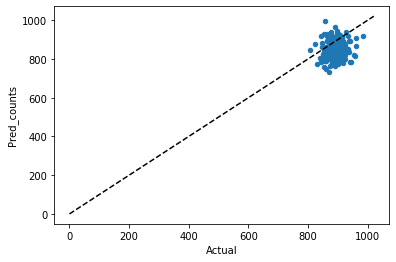

In [6]:
diff_table = sim_week.error_Reporting(test_data=test_data, simulated_data=datat)

In [7]:
diff_table.head()

,datetime,Pred_counts,Actual,Difference
LSOA_code,,,,
West Yorkshire,2019-01-01,823,915,92
West Yorkshire,2019-01-02,846,906,60
West Yorkshire,2019-01-03,801,905,104
West Yorkshire,2019-01-04,803,842,39
West Yorkshire,2019-01-05,811,880,69


## Using utils to get counts to reports

You can use utility functions within the toolkit to convert generated count data back into individual reports. And using the populate_offence function include a more specific crime description (randomly allocated from regional data).

In [0]:
from crime_sim_toolkit import utils

In [9]:
%%time
# generate additional crime descriptions

synth_counts = utils.counts_to_reports(datat)

Datetime column configured.
CPU times: user 1min 15s, sys: 110 ms, total: 1min 15s
Wall time: 1min 15s


In [10]:
%%time
# generate additional crime descriptions

synth_counts_des = utils.populate_offence(synth_counts)

CPU times: user 6min 2s, sys: 82.6 ms, total: 6min 2s
Wall time: 6min 2s


In [11]:
synth_counts_des.head()

,UID,datetime,Crime_type,LSOA_code,Police_force,Crime_description
0,West11AN0,2019-01-01,Anti-social behaviour,West Yorkshire,West Yorkshire,anti-social behaviour
1,West11AN1,2019-01-01,Anti-social behaviour,West Yorkshire,West Yorkshire,anti-social behaviour
2,West11AN2,2019-01-01,Anti-social behaviour,West Yorkshire,West Yorkshire,anti-social behaviour
3,West11AN3,2019-01-01,Anti-social behaviour,West Yorkshire,West Yorkshire,anti-social behaviour
4,West11AN4,2019-01-01,Anti-social behaviour,West Yorkshire,West Yorkshire,anti-social behaviour


In [0]:
# pull out specifically required columns for ABM

synth_counts_des = synth_counts_des[['UID','datetime','Crime_description','Crime_type','LSOA_code','Police_force']]

## Adding in random hours

The agent based models implements hours for shift allocation. We'll perform a simple frame apply function to add hour.

In [0]:
import numpy as np

synth_counts_des['Hour'] = np.random.randint(0,24, synth_counts_des.shape[0])

# reorder columns
synth_counts_des = synth_counts_des[['UID','Year','Mon','Day','Hour','Crime_description','Crime_type','LSOA_code','Police_force']]

In [0]:
synth_counts_des.head()

,UID,Year,Mon,Day,Hour,Crime_description,Crime_type,LSOA_code,Police_force
0,E010111A0,2019,1,1,22,Anti-social behaviour,Anti-social behaviour,E01010650,West Yorkshire
1,E010111A0,2019,1,1,4,Anti-social behaviour,Anti-social behaviour,E01010654,West Yorkshire
2,E010111A0,2019,1,1,9,Anti-social behaviour,Anti-social behaviour,E01010718,West Yorkshire
3,E010111A1,2019,1,1,0,Anti-social behaviour,Anti-social behaviour,E01010718,West Yorkshire
4,E010111A2,2019,1,1,20,Anti-social behaviour,Anti-social behaviour,E01010718,West Yorkshire


## Outputting from Colabs

Data produced can now be exported as a .csv for use in the agent-based model.

In [0]:
synth_counts_des.to_csv('synthetic_day_reports.csv')

In [0]:
from google.colab import files

files.download('synthetic_day_reports.csv')